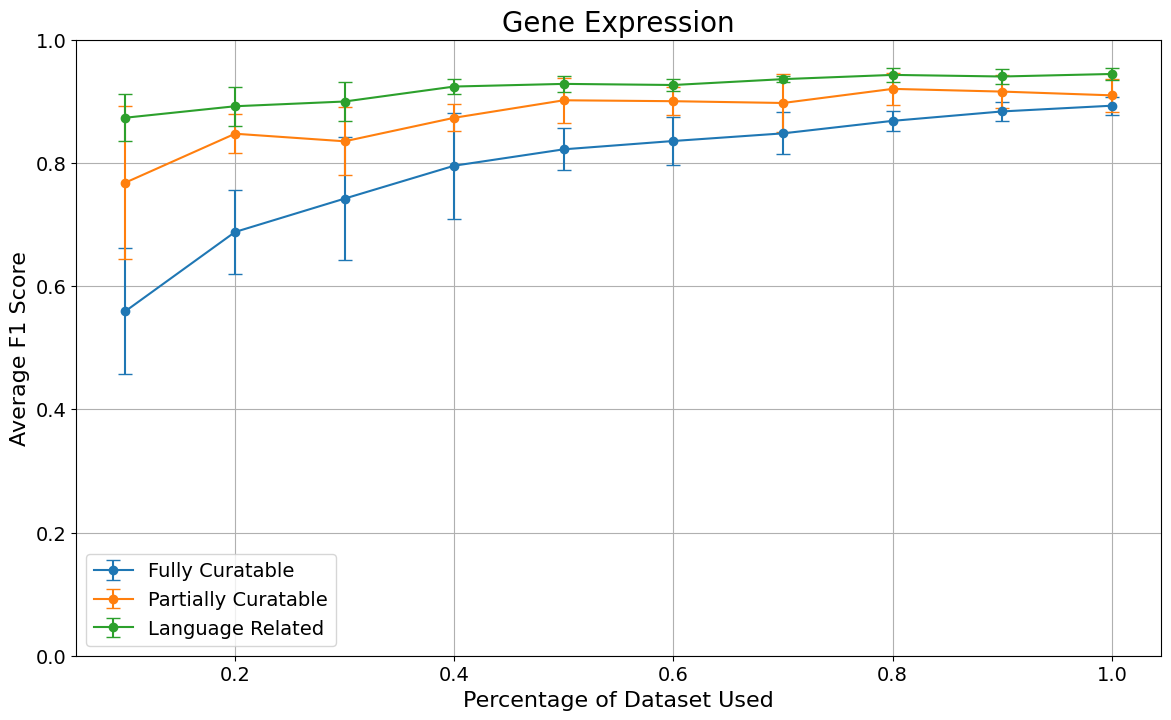

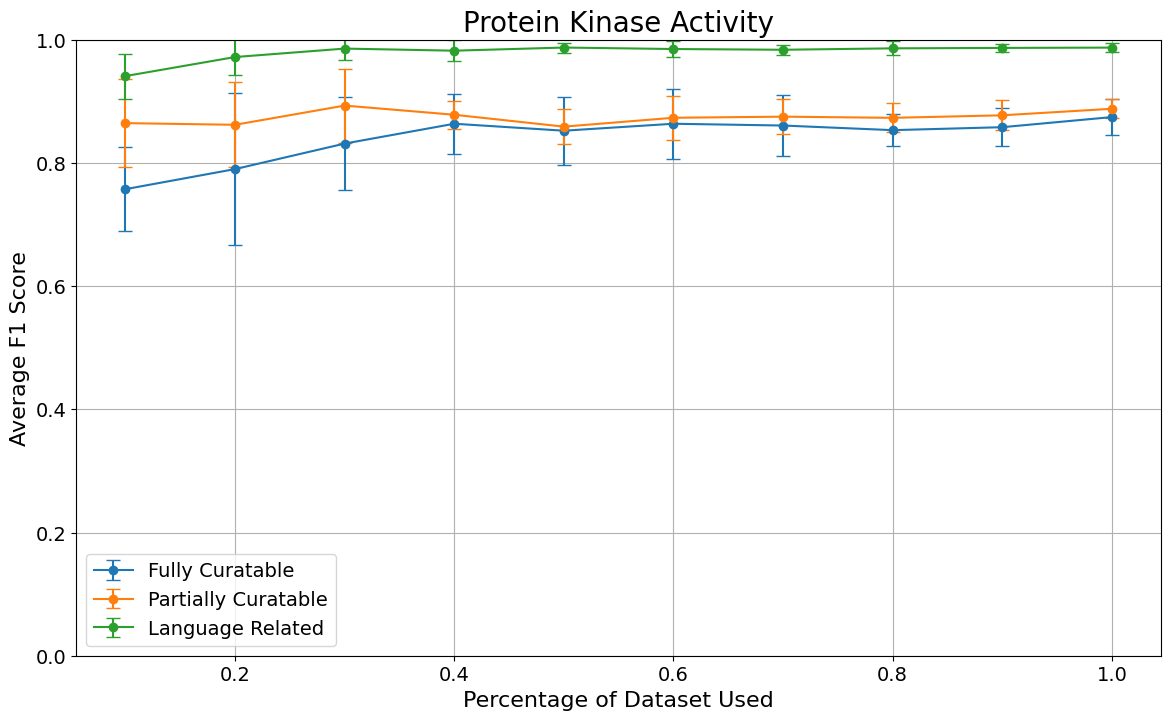

In [12]:
# Cell 1: Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cell 2: Function to plot F1 scores for different subsets
def plot_f1_scores(datasets, title):
    plt.figure(figsize=(14, 8))  # Ensure both plots have the same size

    for dataset in datasets:
        data = dataset['data']
        plt.errorbar(
            data['percentage'], data['average_Fscore'], yerr=data['STD'],
            label=dataset['name'], fmt='-o', capsize=5
        )

    plt.xlabel('Percentage of Dataset Used', fontsize=16)
    plt.ylabel('Average F1 Score', fontsize=16)
    plt.ylim(0, 1)  # Set the y-axis to start from 0 to 1
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

# Cell 3: Load your dataset
base_url = 'http://textmining.textpresso.org/degradation/2024.12.05/destilled-data/'

# Define directories and files
dirs = {'e': 'Gene Expression', 'k': 'Protein Kinase Activity'}
files = {'fully': 'Fully Curatable', 'partially': 'Partially Curatable', 'language': 'Language Related'}

# Placeholder for storing data
expression_data = []
kinase_activity_data = []

# Define column names
column_names = ['percentage', 'average_Fscore', 'STD']

# Load data from each directory and file
for dir_key, dir_name in dirs.items():
    for file_key, file_name in files.items():
        file_url = f'{base_url}{dir_key}/{file_key}'
        df = pd.read_csv(file_url, delim_whitespace=True, names=column_names, header=None)  # Specify column names and no header
        dataset = {
            'name': file_name,
            'data': df
        }
        if dir_key == 'e':
            expression_data.append(dataset)
        elif dir_key == 'k':
            kinase_activity_data.append(dataset)

# Cell 4: Plot F1 scores for Gene Expression data
plot_f1_scores(expression_data, 'Gene Expression')

# Cell 5: Plot F1 scores for Protein Kinase Activity data
plot_f1_scores(kinase_activity_data, 'Protein Kinase Activity')
